In [1]:
import os
import pandas as pd
# Adjusting the method provided by the user to read and parse the 'ghfb190901.pos' file

file_path = os.path.join('./ghfb190901.pos')

with open(file_path, 'r') as file:
    ghfb_content = file.readlines()

# Filtering data lines
data_lines = [line for line in ghfb_content if not line.startswith('%')]

# Parsing the data
ghfb_data_split = [line.split(",") for line in data_lines[1:]]
for row in ghfb_data_split:
    last_items = row[-1].split()
    row[-1] = last_items[0]
    row.extend(last_items[1:])
ghfb_df_adjusted = pd.DataFrame(ghfb_data_split, columns=data_lines[0].split(","))
ghfb_df_adjusted['GPST'] = pd.to_datetime(ghfb_df_adjusted['   GPST                '].str.strip())
ghfb_df_adjusted['vu(m/s)'] = ghfb_df_adjusted['   vu(m/s)'].astype(float)
# ghfb_df_adjusted['GPST'] = ghfb_df_adjusted['GPST'] - pd.Timedelta(seconds=5)

# Previewing the first few rows of the parsed data
# ghfb_df_adjusted.head()
# Extracting the 'GPST' and 'vu(m/s)' columns from the parsed dataframe

selected_data = ghfb_df_adjusted[['GPST', 'vu(m/s)']]

# Previewing the first few rows of the selected data
selected_data_preview = selected_data.head()
selected_data_preview


,GPST,vu(m/s)
0,2019-03-31 01:15:23,-0.00750
1,2019-03-31 01:15:24,0.06497
2,2019-03-31 01:15:25,-0.21839
3,2019-03-31 01:15:26,0.16367
4,2019-03-31 01:15:27,0.12198


In [2]:
# Applying the provided method to read and parse the 'ghfb19090t5.pos' file

file_path_5hz = os.path.join('./ghfb19090t5.pos')

with open(file_path_5hz, 'r') as file:
    ghfb5_content = file.readlines()

# Filtering data lines
data_lines_5hz = [line for line in ghfb5_content if not line.startswith('%')]

# Parsing the data
ghfb5_data_split = [line.split(",") for line in data_lines_5hz[1:]]
for row in ghfb5_data_split:
    last_items = row[-1].split()
    row[-1] = last_items[0]
    row.extend(last_items[1:])
ghfb5_df_adjusted = pd.DataFrame(ghfb5_data_split, columns=data_lines_5hz[0].split(","))
ghfb5_df_adjusted['GPST'] = pd.to_datetime(ghfb5_df_adjusted['   GPST                '].str.strip())
ghfb5_df_adjusted['vu(m/s)'] = ghfb5_df_adjusted['   vu(m/s)'].astype(float)
ghfb5_df_adjusted['GPST'] = ghfb5_df_adjusted['GPST']

# Extracting the 'GPST' and 'vu(m/s)' columns
selected_data_5hz = ghfb5_df_adjusted[['GPST', 'vu(m/s)']]

# Previewing the first few rows of the selected data from the second file
selected_data_5hz_preview = selected_data_5hz.head()
selected_data_5hz_preview


,GPST,vu(m/s)
0,2019-03-31 01:15:23.000,-0.08498
1,2019-03-31 01:15:23.200,-0.18488
2,2019-03-31 01:15:23.400,-0.03768
3,2019-03-31 01:15:23.600,0.21323
4,2019-03-31 01:15:23.800,0.19716


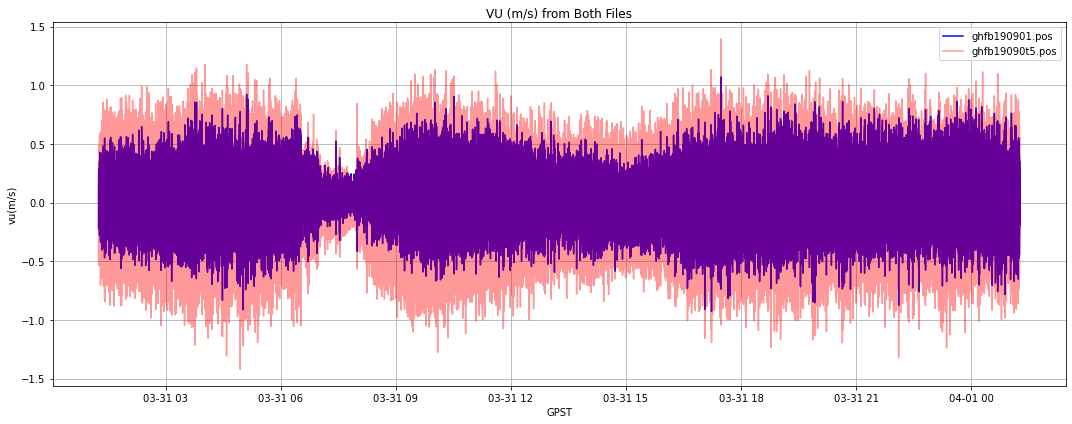

In [3]:
import matplotlib.pyplot as plt

# Plotting the 'vu(m/s)' data from both files

plt.figure(figsize=(15, 6))

# Plotting for 'ghfb190901.pos'
plt.plot(selected_data['GPST'], selected_data['vu(m/s)'], label='ghfb190901.pos', color='blue')

# Plotting for 'ghfb19090t5.pos'
plt.plot(selected_data_5hz['GPST'], selected_data_5hz['vu(m/s)'], label='ghfb19090t5.pos', color='red', alpha=0.4)

plt.title('VU (m/s) from Both Files')
plt.xlabel('GPST')
plt.ylabel('vu(m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


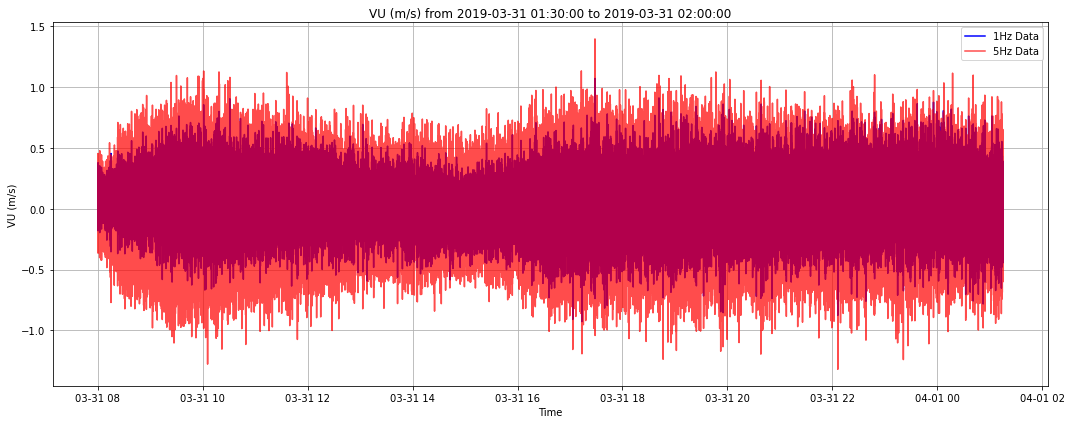

In [4]:
selected_data_1hz=selected_data
# Filtering the data for the specified time range: "2019-03-31 01:30:00" to "2019-03-31 02:00:00"
start_time_filter = pd.Timestamp("2019-03-31 8:00:00")
end_time_filter = pd.Timestamp("2019-04-01 1:30:00")

filtered_data_1hz = selected_data_1hz[(selected_data_1hz['GPST'] >= start_time_filter) & (selected_data_1hz['GPST'] <= end_time_filter)]
filtered_data_5hz = selected_data_5hz[(selected_data_5hz['GPST'] >= start_time_filter) & (selected_data_5hz['GPST'] <= end_time_filter)]

# Filtering the SSH data for the specified time range
# filtered_ghf_ssh = ghf_ssh_df[(ghf_ssh_df['UTC'] >= start_time_filter) & (ghf_ssh_df['UTC'] <= end_time_filter)]

# Plotting the 'vu(m/s)' data for the specified time range
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_data_1hz['vu(m/s)'], label='1Hz Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_data_5hz['vu(m/s)'], label='5Hz Data', color='red', alpha=0.7)
plt.title('VU (m/s) from 2019-03-31 01:30:00 to 2019-03-31 02:00:00')
plt.xlabel('Time')
plt.ylabel('VU (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# 速度积分得到SSH# Calculating SSH from the velocity data

# For 1Hz data
filtered_data_1hz['SSH'] = filtered_data_1hz['vu(m/s)'].cumsum() * (filtered_data_1hz['GPST'].diff().dt.total_seconds().fillna(0))
filtered_data_1hz['SSH'] = filtered_data_1hz['SSH'] - filtered_data_1hz['SSH'].iloc[0]  # Resetting the initial value to 0

# For 5Hz data
filtered_data_5hz['SSH'] = filtered_data_5hz['vu(m/s)'].cumsum() * (filtered_data_5hz['GPST'].diff().dt.total_seconds().fillna(0))
filtered_data_5hz['SSH'] = filtered_data_5hz['SSH'] - filtered_data_5hz['SSH'].iloc[0]  # Resetting the initial value to 0

# Returning the first few rows of the SSH data for both datasets
filtered_data_1hz_head, filtered_data_5hz_head = filtered_data_1hz.head(), filtered_data_5hz.head()
filtered_data_1hz_head, filtered_data_5hz_head


C:\Users\yangleir\AppData\Local\Temp/ipykernel_12972/3743875163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1hz['SSH'] = filtered_data_1hz['vu(m/s)'].cumsum() * (filtered_data_1hz['GPST'].diff().dt.total_seconds().fillna(0))
C:\Users\yangleir\AppData\Local\Temp/ipykernel_12972/3743875163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1hz['SSH'] = filtered_data_1hz['SSH'] - filtered_data_1hz['SSH'].iloc[0]  # Resetting the initial value to 0
C:\Users\yangleir\AppData\

(                     GPST  vu(m/s)      SSH
 24277 2019-03-31 08:00:00  0.11780  0.00000
 24278 2019-03-31 08:00:01 -0.02495  0.09285
 24279 2019-03-31 08:00:02 -0.03749  0.05536
 24280 2019-03-31 08:00:03  0.17019  0.22555
 24281 2019-03-31 08:00:04  0.13312  0.35867,
                           GPST  vu(m/s)       SSH
 121385 2019-03-31 08:00:00.000  0.22730  0.000000
 121386 2019-03-31 08:00:00.200  0.04898  0.055256
 121387 2019-03-31 08:00:00.400 -0.05644  0.043968
 121388 2019-03-31 08:00:00.600 -0.07799  0.028370
 121389 2019-03-31 08:00:00.800 -0.06174  0.016022)

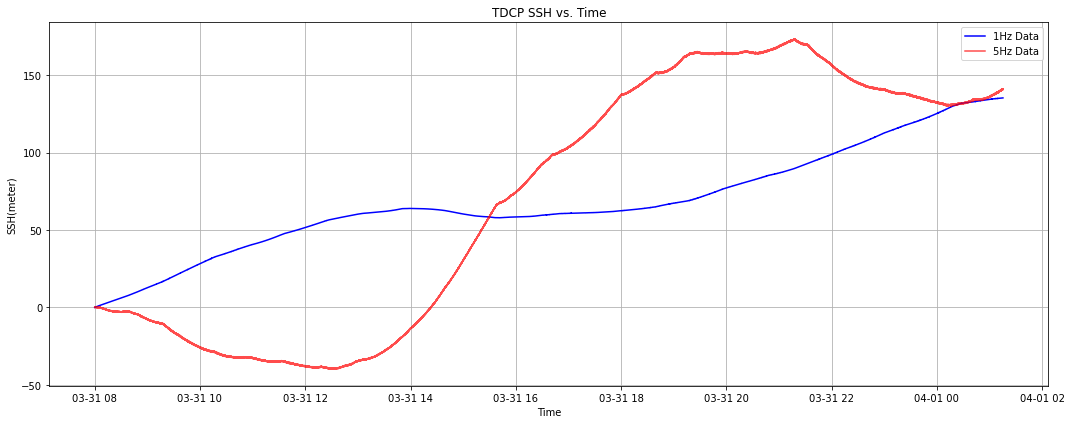

In [22]:
import matplotlib.pyplot as plt

# Plotting the SSH data for both datasets
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_data_1hz['SSH']/20, label='1Hz Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_data_5hz['SSH'], label='5Hz Data', color='red', alpha=0.7)
plt.title('TDCP SSH vs. Time')
plt.xlabel('Time')
plt.ylabel('SSH(meter)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\yangleir\miniconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\yangleir\AppData\Local\Temp/ipykernel_6352/2049218299.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1hz['SSE'] = highpass_filter(filtered_data_1hz['SSH'], 1/30, sampling_frequency_1hz)
C:\Users\yangleir\AppData\Local\Temp/ipykernel_6352/2049218299.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

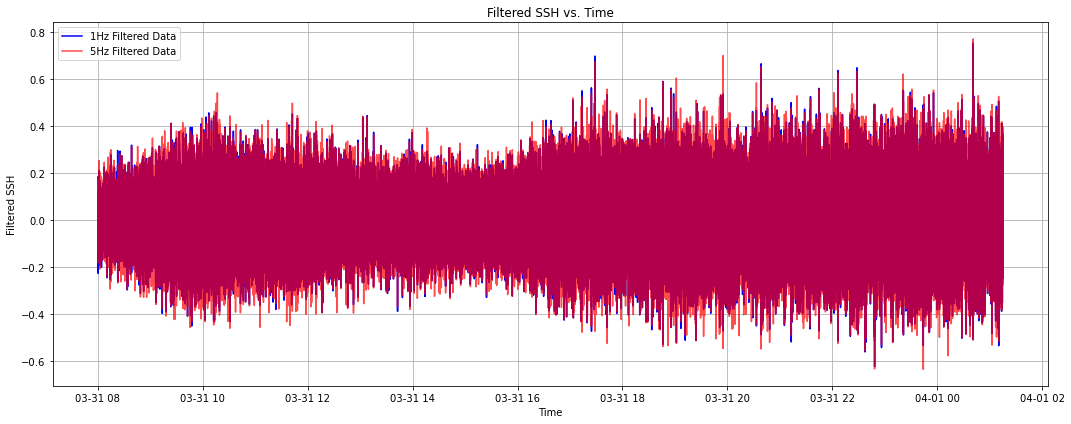

In [7]:
# 高通滤波得到SSE
import numpy as np
from scipy.signal import butter, filtfilt

# Define the high-pass filter
def highpass_filter(data, cutoff_frequency, sampling_frequency):
    nyquist = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(1, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define the sampling frequency based on the data rate
sampling_frequency_1hz = 1.0  # For 1Hz data
sampling_frequency_5hz = 5.0  # For 5Hz data

# Filter the SSH data for 1Hz dataset
filtered_data_1hz['SSE'] = highpass_filter(filtered_data_1hz['SSH'], 1/30, sampling_frequency_1hz)

# Filter the SSH data for 5Hz dataset
filtered_data_5hz['SSE'] = highpass_filter(filtered_data_5hz['SSH'], 1/30, sampling_frequency_5hz)

# # Previewing the first few rows of the filtered SSH data (SSE) for both datasets
# filtered_SSE_1hz_head, filtered_SSE_5hz_head = filtered_data_1hz.head(), filtered_data_5hz.head()
# filtered_SSE_1hz_head, filtered_SSE_5hz_head

# Plotting the filtered SSH data
plt.figure(figsize=(15, 6))
plt.plot(filtered_data_1hz['GPST'], filtered_data_1hz['SSE'], label='1Hz Filtered Data', color='blue')
plt.plot(filtered_data_5hz['GPST'], filtered_data_5hz['SSE'], label='5Hz Filtered Data', color='red', alpha=0.7)
# plt.plot(filtered_ghf_ssh['UTC'], filtered_SSH_1hz_ppk, label='1Hz Filtered Data PPK', color='yellow', alpha=0.7)
plt.title('Filtered SSH vs. Time')
plt.xlabel('Time')
plt.ylabel('Filtered SSH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


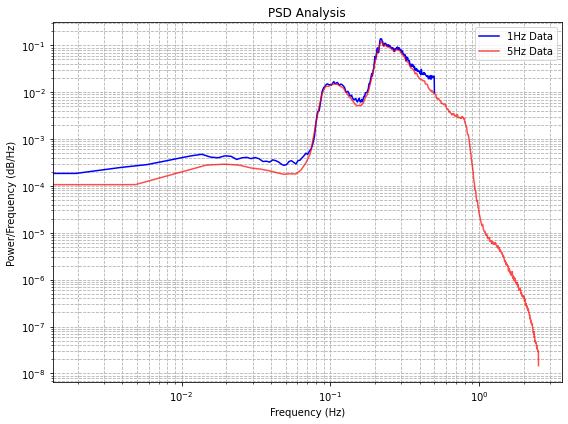

In [8]:
# SSE做FFT，得到PSD。比较1Hz和5Hz的PSD差异
from scipy.signal import welch

# Compute the PSD using Welch's method
frequencies_1hz, PSD_1hz = welch(filtered_data_1hz['SSE'], fs=sampling_frequency_1hz, nperseg=512)

frequencies_5hz, PSD_5hz = welch(filtered_data_5hz['SSE'], fs=sampling_frequency_5hz, nperseg=1024)

# frequencies_1hz_ppk, PSD_1hz_ppk = welch(filtered_SSH_1hz_ppk, fs=sampling_frequency_1hz, nperseg=128)

# Plotting the PSD for both datasets

plt.figure(figsize=(8, 6))
plt.loglog(frequencies_1hz, PSD_1hz, label='1Hz Data', color='blue')
plt.loglog(frequencies_5hz, PSD_5hz, label='5Hz Data', color='red', alpha=0.7)
# plt.loglog(frequencies_1hz_ppk, PSD_1hz_ppk, label='1Hz Data PPK', color='black', alpha=0.7)
plt.title('PSD Analysis')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


In [28]:
frequencies_1hz

array([0.        , 0.00195312, 0.00390625, 0.00585938, 0.0078125 ,
       0.00976562, 0.01171875, 0.01367188, 0.015625  , 0.01757812,
       0.01953125, 0.02148438, 0.0234375 , 0.02539062, 0.02734375,
       0.02929688, 0.03125   , 0.03320312, 0.03515625, 0.03710938,
       0.0390625 , 0.04101562, 0.04296875, 0.04492188, 0.046875  ,
       0.04882812, 0.05078125, 0.05273438, 0.0546875 , 0.05664062,
       0.05859375, 0.06054688, 0.0625    , 0.06445312, 0.06640625,
       0.06835938, 0.0703125 , 0.07226562, 0.07421875, 0.07617188,
       0.078125  , 0.08007812, 0.08203125, 0.08398438, 0.0859375 ,
       0.08789062, 0.08984375, 0.09179688, 0.09375   , 0.09570312,
       0.09765625, 0.09960938, 0.1015625 , 0.10351562, 0.10546875,
       0.10742188, 0.109375  , 0.11132812, 0.11328125, 0.11523438,
       0.1171875 , 0.11914062, 0.12109375, 0.12304688, 0.125     ,
       0.12695312, 0.12890625, 0.13085938, 0.1328125 , 0.13476562,
       0.13671875, 0.13867188, 0.140625  , 0.14257812, 0.14453

In [9]:
# 1. Compute the PSD using Welch's method with specified parameters
frequencies_1hz, PSD_1hz = welch(filtered_data_1hz['SSE'], fs=sampling_frequency_1hz, nperseg=512)
frequencies_5hz, PSD_5hz = welch(filtered_data_5hz['SSE'], fs=sampling_frequency_5hz, nperseg=1024)

# 2. Define a function to compute zeroth and first order moments for PSD
def compute_moments(frequencies, PSD):
    # Compute frequency intervals
    delta_f = np.diff(frequencies)
    # Append the last interval to make it the same size as PSD
    delta_f = np.append(delta_f, delta_f[-1])
    
    # Zeroth moment (total power)
    M0 = np.sum(PSD * delta_f)
    # First moment (center frequency)
    M1 = np.sum(frequencies * PSD * delta_f)
    
    return M0, M1

# Compute moments for the given PSDs
M0_1hz, M1_1hz = compute_moments(frequencies_1hz, PSD_1hz)
M0_5hz, M1_5hz = compute_moments(frequencies_5hz, PSD_5hz)

M0_1hz, M1_1hz, M0_5hz, M1_5hz


(0.017486785117288524,
 0.005034501654864736,
 0.01659200682969853,
 0.005143395551938752)

In [31]:
def compute_moments(frequencies, PSD, f_min, f_max):
    # 找到在指定范围内的频率索引
    indices = np.where((frequencies >= f_min) & (frequencies <= f_max))

    # 仅使用这些索引中的频率和PSD值
    freqs_in_range = frequencies[indices]
    PSD_in_range = PSD[indices]

    # 计算频率间隔
    delta_f = np.diff(freqs_in_range)
    delta_f = np.append(delta_f, delta_f[-1])  # 附加最后一个间隔

    # 零阶矩（总功率）
    M0 = np.sum(PSD_in_range * delta_f)
    # 一阶矩（中心频率）
    M1 = np.sum(freqs_in_range * PSD_in_range * delta_f)

    return M0, M1
# Compute moments for the given PSDs
M0_1hz, M1_1hz = compute_moments(frequencies_1hz, PSD_1hz,0.0333,0.5)
M0_5hz, M1_5hz = compute_moments(frequencies_5hz, PSD_5hz,0.0333,2.5)

M0_1hz, M1_1hz, M0_5hz, M1_5hz

(0.01747417382330806,
 0.005034269553280358,
 0.01658493870504186,
 0.005143268261743653)

In [10]:
# Define the start and end times
start_time = pd.Timestamp("2019-03-31 8:00:00")
end_time = pd.Timestamp("2019-04-01 1:30:00")
# Re-initialize the list to store the lengths of data segments
data_lengths = []

# Loop through the data in half-hour intervals after every hour
current_time = start_time
while current_time < end_time:
    # Filter data for the half-hour interval after the current hour
    half_hour_data = filtered_data_1hz[(filtered_data_1hz['GPST'] >= current_time) & (filtered_data_1hz['GPST'] < current_time + pd.Timedelta(minutes=30))]
    
    # Append the length of the current data segment to the list
    data_lengths.append(len(half_hour_data))
    
    # Move to the next hour
    current_time += pd.Timedelta(hours=1)

data_lengths


[1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 1800,
 923]

In [32]:
# Reset lists to store SWH and wave period
SWH_list = []
wave_period_list = []


# Half an hour in seconds
half_hour_seconds = 30 * 60

# Loop through the data in half-hour intervals after every hour
current_time = start_time
while current_time < end_time:
    # Filter data for the half-hour interval after the current hour
    half_hour_data = filtered_data_1hz[(filtered_data_1hz['GPST'] >= current_time) & (filtered_data_1hz['GPST'] < current_time + pd.Timedelta(minutes=30))]
    
    # Only process segments with enough data points
    if len(half_hour_data) > 1:
        # Adjust nperseg value if data segment is too short
        nperseg_current = min(512, len(half_hour_data))
        
        # Compute PSD for the current interval
        frequencies_current, PSD_current = welch(half_hour_data['SSE'], fs=sampling_frequency_1hz, nperseg=nperseg_current)
        
        # Compute moments
        M0_current, M1_current = compute_moments(frequencies_current, PSD_current,0.0333,0.5)
        
        # Calculate SWH and wave period
        SWH = 4 * np.sqrt(M0_current)
        wave_period = M0_current / M1_current if M1_current != 0 else 0  # Guard against division by zero
        
        # Append the results to the lists
        SWH_list.append(SWH)
        wave_period_list.append(wave_period)
    
    # Move to the next hour
    current_time += pd.Timedelta(hours=1)

SWH_list, wave_period_list



([0.3094779908434965,
  0.4795035743711466,
  0.565536466106431,
  0.4753576340122804,
  0.44722074317924926,
  0.39085195238625114,
  0.40004566081504844,
  0.34566016706406544,
  0.46420669269344783,
  0.5925920870790365,
  0.5409596121174918,
  0.6191096250401333,
  0.5348613095959203,
  0.6032575759325649,
  0.6339908596969401,
  0.6509947811565963,
  0.6351342920699147],
 [3.8062597572083305,
  3.028045312501999,
  3.2194218429315344,
  3.263584119704025,
  3.2873898216524915,
  3.2739167097658584,
  3.235157579088437,
  3.2387235127832996,
  3.004955413728252,
  3.2211786207193747,
  3.26403195161735,
  3.4731168675987507,
  3.5539865362754632,
  3.76145876926019,
  3.8592359165735384,
  4.010223237303784,
  3.961144009384474])

In [34]:
# Initialize lists to store SWH and wave period for 5Hz data
SWH_list_5hz = []
wave_period_list_5hz = []

# Loop through the data in half-hour intervals after every hour
current_time = start_time
while current_time < end_time:
    # Filter data for the half-hour interval after the current hour
    half_hour_data = filtered_data_5hz[(filtered_data_5hz['GPST'] >= current_time) & (filtered_data_5hz['GPST'] < current_time + pd.Timedelta(minutes=30))]
    
    # Only process segments with enough data points
    if len(half_hour_data) > 1:
        # Adjust nperseg value if data segment is too short
        nperseg_current = min(1024, len(half_hour_data))
        
        # Compute PSD for the current interval
        frequencies_current, PSD_current = welch(half_hour_data['SSE'], fs=sampling_frequency_5hz, nperseg=nperseg_current)
        
        # Compute moments
        M0_current, M1_current = compute_moments(frequencies_current, PSD_current,0.0333,2.5)
        
        # Calculate SWH and wave period
        SWH = 4 * np.sqrt(M0_current)
        wave_period = M0_current / M1_current if M1_current != 0 else 0  # Guard against division by zero
        
        # Append the results to the lists
        SWH_list_5hz.append(SWH)
        wave_period_list_5hz.append(wave_period)
    
    # Move to the next hour
    current_time += pd.Timedelta(hours=1)

SWH_list_5hz, wave_period_list_5hz


([0.30254774171835436,
  0.46919488453151914,
  0.5476379443227813,
  0.46358394120167806,
  0.4350407084608927,
  0.3816312560581026,
  0.379305739638637,
  0.3412816883267945,
  0.4426359746014684,
  0.5834222417551854,
  0.5204326315622315,
  0.6181631062539696,
  0.5305598951753913,
  0.5820837866913694,
  0.6192851170528535,
  0.6246332078344554,
  0.6279710683566703],
 [3.055981967420003,
  2.6267314511938347,
  2.811528495735481,
  2.8904050510310673,
  2.9884455310661844,
  3.0361886434980674,
  3.0242311002962188,
  2.912867439246491,
  2.7998341843604586,
  3.075706691588627,
  3.038115095569564,
  3.3207390874032092,
  3.2855774476873134,
  3.5644071272551745,
  3.6782386740086177,
  3.828873263905358,
  3.8264470867042317])

In [35]:
# Compute the differences between 5Hz and 1Hz data for SWH and wave period
SWH_difference = np.array(SWH_list_5hz) - np.array(SWH_list)

wave_period_difference = np.array(wave_period_list_5hz) - np.array(wave_period_list)

SWH_difference, wave_period_difference


(array([-0.00693025, -0.01030869, -0.01789852, -0.01177369, -0.01218003,
        -0.0092207 , -0.02073992, -0.00437848, -0.02157072, -0.00916985,
        -0.02052698, -0.00094652, -0.00430141, -0.02117379, -0.01470574,
        -0.02636157, -0.00716322]),
 array([-0.75027779, -0.40131386, -0.40789335, -0.37317907, -0.29894429,
        -0.23772807, -0.21092648, -0.32585607, -0.20512123, -0.14547193,
        -0.22591686, -0.15237778, -0.26840909, -0.19705164, -0.18099724,
        -0.18134997, -0.13469692]))

In [36]:
# Compute mean and standard deviation for the differences
SWH_diff_mean = np.mean(SWH_difference)
SWH_diff_std = np.std(SWH_difference)

wave_period_diff_mean = np.mean(wave_period_difference)
wave_period_diff_std = np.std(wave_period_difference)

SWH_diff_mean, SWH_diff_std, wave_period_diff_mean, wave_period_diff_std


(-0.012902946506921172,
 0.007140074342054897,
 -0.27632421412513236,
 0.1455790721137387)

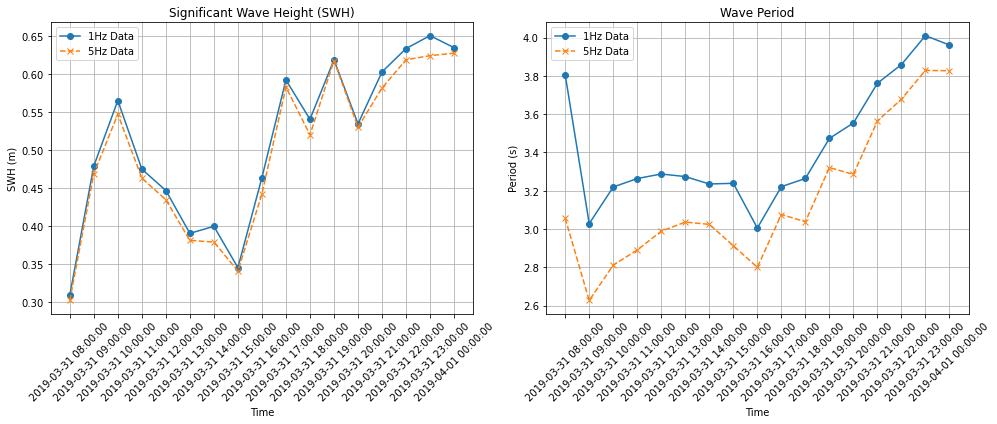

In [37]:
# Generate time labels for the x-axis
time_labels = [str(start_time + pd.Timedelta(hours=i)) for i in range(len(SWH_list))]

# Plotting SWH and wave period for both 1Hz and 5Hz data
plt.figure(figsize=(14, 6))

# Plot SWH
plt.subplot(1, 2, 1)
plt.plot(time_labels, SWH_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels, SWH_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.title('Significant Wave Height (SWH)')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot wave period
plt.subplot(1, 2, 2)
plt.plot(time_labels, wave_period_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels, wave_period_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.title('Wave Period')
plt.xlabel('Time')
plt.ylabel('Period (s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [38]:
# Import the Excel file
xmd_df = pd.read_excel("./XMD.xls")

# Display the first few rows of the dataframe to understand its structure and content
xmd_df_head = xmd_df.head()
xmd_df_head


,说明：海浪使用山仪所SBF3-2型波浪浮标，布放位置为小麦岛站观测楼南侧约1km海面（36°03′N，120°25′E），水深25m左右。观测频率为1小时1次（没有1分钟数据），波高单位为m，周期单位为s，波向单位为°（-表示不观测）。,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,时间,平均波高,有效波高,平均波周期,有效波周期,波向,海况等级
1,2019年3月31日09时,0.2,0.3,3.2,3.8,-,1
2,2019年3月31日10时,0.2,0.3,3.3,3.8,-,1
3,2019年3月31日11时,0.2,0.2,3.5,4.1,X,1
4,2019年3月31日12时,0.2,0.2,3.5,3.9,-,1


In [39]:
# Using the correct column names from the first row
correct_column_names = xmd_df.iloc[0].values

# Updating the dataframe column names
xmd_df.columns = correct_column_names

# Dropping the first row which now contains redundant headers
xmd_df_updated = xmd_df.drop(0).reset_index(drop=True)

# Extracting the desired columns: "时间", "有效波高", and "平均波周期"
selected_columns_df_corrected = xmd_df_updated[["时间", "有效波高", "平均波周期"]]

# Display the first few rows of the selected data
selected_columns_df_corrected_head = selected_columns_df_corrected.head()
selected_columns_df_corrected_head


,时间,有效波高,平均波周期
0,2019年3月31日09时,0.3,3.2
1,2019年3月31日10时,0.3,3.3
2,2019年3月31日11时,0.2,3.5
3,2019年3月31日12时,0.2,3.5
4,2019年3月31日13时,0.2,3.7


In [40]:
# Convert the time format "2019年3月31日09时" to a standard datetime format
def convert_to_datetime(time_str):
    year = int(time_str.split("年")[0])
    month = int(time_str.split("年")[1].split("月")[0])
    day = int(time_str.split("月")[1].split("日")[0])
    hour = int(time_str.split("日")[1].split("时")[0])
    return pd.Timestamp(year=year, month=month, day=day, hour=hour)

# Applying the conversion to the '时间' column
selected_columns_df_corrected['时间'] = selected_columns_df_corrected['时间'].apply(convert_to_datetime)
# Adjust the "时间" column by subtracting 8 hours to convert from Beijing time to UTC
selected_columns_df_corrected["时间"] -= pd.Timedelta(hours=8)
selected_columns_df_corrected



C:\Users\yangleir\AppData\Local\Temp/ipykernel_6352/4261406953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df_corrected['时间'] = selected_columns_df_corrected['时间'].apply(convert_to_datetime)
C:\Users\yangleir\AppData\Local\Temp/ipykernel_6352/4261406953.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df_corrected["时间"] -= pd.Timedelta(hours=8)


,时间,有效波高,平均波周期
0,2019-03-31 01:00:00,0.3,3.2
1,2019-03-31 02:00:00,0.3,3.3
2,2019-03-31 03:00:00,0.2,3.5
3,2019-03-31 04:00:00,0.2,3.5
4,2019-03-31 05:00:00,0.2,3.7
5,2019-03-31 06:00:00,0.3,3.7
6,2019-03-31 07:00:00,0.3,3.5
7,2019-03-31 08:00:00,0.3,3.4
8,2019-03-31 09:00:00,0.4,3
9,2019-03-31 10:00:00,0.6,3.3


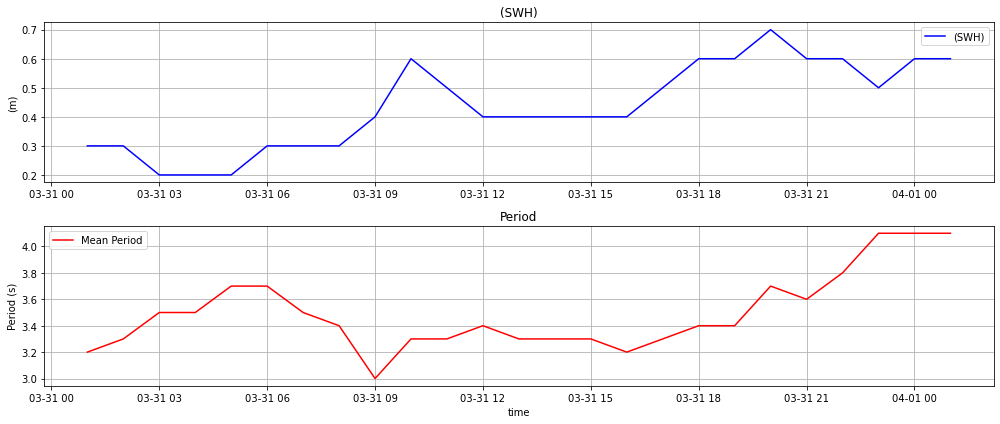

In [41]:

# Plotting the time series again
plt.figure(figsize=(14, 6))

# Plotting SWH
plt.subplot(2, 1, 1)
plt.plot(selected_columns_df_corrected['时间'], selected_columns_df_corrected['有效波高'], label='(SWH)', color='blue')
plt.title('(SWH)')
plt.ylabel('(m)')
plt.legend()
plt.grid(True)

# Plotting average wave period
plt.subplot(2, 1, 2)
plt.plot(selected_columns_df_corrected['时间'], selected_columns_df_corrected['平均波周期'], label='Mean Period', color='red')
plt.title('Period')
plt.xlabel('time')
plt.ylabel('Period (s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
selected_columns_df_corrected

,时间,有效波高,平均波周期
0,2019-03-31 01:00:00,0.3,3.2
1,2019-03-31 02:00:00,0.3,3.3
2,2019-03-31 03:00:00,0.2,3.5
3,2019-03-31 04:00:00,0.2,3.5
4,2019-03-31 05:00:00,0.2,3.7
5,2019-03-31 06:00:00,0.3,3.7
6,2019-03-31 07:00:00,0.3,3.5
7,2019-03-31 08:00:00,0.3,3.4
8,2019-03-31 09:00:00,0.4,3
9,2019-03-31 10:00:00,0.6,3.3


In [43]:
# Filtering the XMD data based on the time range of the 1Hz data (time_labels)
filtered_selected_columns_df = selected_columns_df_corrected[(selected_columns_df_corrected["时间"] >= time_labels[0]) & 
                                                             (selected_columns_df_corrected["时间"] <= time_labels[-1])]

filtered_selected_columns_df


,时间,有效波高,平均波周期
7,2019-03-31 08:00:00,0.3,3.4
8,2019-03-31 09:00:00,0.4,3
9,2019-03-31 10:00:00,0.6,3.3
10,2019-03-31 11:00:00,0.5,3.3
11,2019-03-31 12:00:00,0.4,3.4
12,2019-03-31 13:00:00,0.4,3.3
13,2019-03-31 14:00:00,0.4,3.3
14,2019-03-31 15:00:00,0.4,3.3
15,2019-03-31 16:00:00,0.4,3.2
16,2019-03-31 17:00:00,0.5,3.3


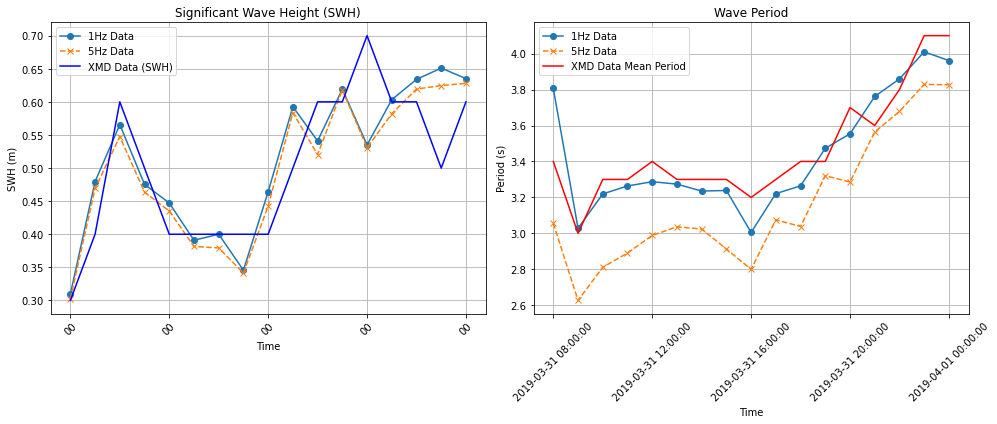

In [44]:
# Convert datetime objects to string format for plotting
time_labels_str = [str(t) for t in time_labels]
filtered_xmd_time_str = filtered_selected_columns_df['时间'].astype(str)

# Define a custom tick formatter
def custom_date_format(x, _):
    return pd.to_datetime(x).strftime('%H')

# # Correct the custom tick formatter to interpret date from string correctly
# def custom_date_format_corrected(x, _):
#     return pd.Timestamp(x).strftime('%m-%d %H')

plt.figure(figsize=(14, 6))

# Plot SWH
plt.subplot(1, 2, 1)
plt.plot(time_labels_str, SWH_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels_str, SWH_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.plot(filtered_xmd_time_str, filtered_selected_columns_df['有效波高'], label='XMD Data (SWH)', color='blue')
plt.title('Significant Wave Height (SWH)')
plt.xlabel('Time')
plt.ylabel('SWH (m)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Set the number of x-axis ticks to have 4-hour intervals
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(custom_date_format))  # Set custom date format

# Plot wave period
plt.subplot(1, 2, 2)
plt.plot(time_labels_str, wave_period_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels_str, wave_period_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.plot(filtered_xmd_time_str, filtered_selected_columns_df['平均波周期'], label='XMD Data Mean Period', color='red')
plt.title('Wave Period')
plt.xlabel('Time')
plt.ylabel('Period (s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Set the number of x-axis ticks to have 4-hour intervals

plt.tight_layout()
plt.show()


In [45]:
# Filtering the XMD data based on the range of 1Hz data
start_time = pd.Timestamp(time_labels_str[0])
end_time = pd.Timestamp(time_labels_str[-1])

filtered_selected_columns_df = selected_columns_df_corrected[(selected_columns_df_corrected['时间'] >= start_time) & (selected_columns_df_corrected['时间'] <= end_time)]
filtered_xmd_time_str_filtered = filtered_selected_columns_df['时间'].astype(str)


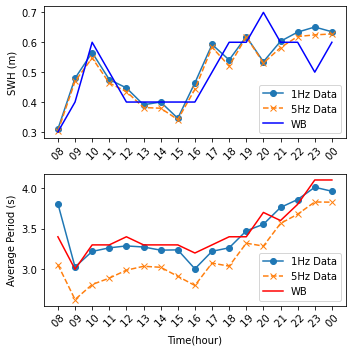

In [48]:
# Determine the x-tick labels
x_ticks = time_labels_str + list(filtered_xmd_time_str_filtered)

# Remove duplicates
x_ticks = list(dict.fromkeys(x_ticks))

# Extract hours from the timestamps for labels
x_tick_labels = [pd.Timestamp(t).strftime(' %H') for t in x_ticks]

plt.figure(figsize=(5, 5))

# Plot SWH
plt.subplot(2, 1, 1)
plt.plot(time_labels_str, SWH_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels_str, SWH_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.plot(filtered_xmd_time_str_filtered, filtered_selected_columns_df['有效波高'], label='WB', color='blue')
# plt.title('Significant Wave Height (SWH)')
# plt.xlabel('Time(hour)')
plt.ylabel('SWH (m)')
plt.legend()
# plt.grid(True)
plt.xticks(x_ticks, x_tick_labels, rotation=45)

# Plot wave period
plt.subplot(2, 1, 2)
plt.plot(time_labels_str, wave_period_list, label='1Hz Data', marker='o', linestyle='-')
plt.plot(time_labels_str, wave_period_list_5hz, label='5Hz Data', marker='x', linestyle='--')
plt.plot(filtered_xmd_time_str_filtered, filtered_selected_columns_df['平均波周期'], label='WB', color='red')
# plt.title('Wave Period')
plt.xlabel('Time(hour)')
plt.ylabel('Average Period (s)')
plt.legend()
# plt.grid(True)
plt.xticks(x_ticks, x_tick_labels, rotation=45)

plt.tight_layout()
plt.savefig("./5hz-3.pdf")
plt.show()
